# Loan Eligability Prediction Pipeline for Deutsche Bank

In our generation, AI & Data Science are the core aspects of innovation. In fact, AI automates and speeds up lengthy, monote tasks that humans once performed. In the world of banking, such tools are vital. Dealing with millions of rows of financial data becomes impossible to do manually. 

As part of the data science and analytics team of Deutsche Bank here in Berlin, I plan to automate one of our most hectic and time-consuming tasks: Determing whether a candidate is eligable for a loan. Such a decision needs to take in count many aspects. Most importantly, the candidate must seem trustworthy enough to pay back the loan. 

Through the following pipeline and the provided data sets from the data collection team, I plan to study the patterns that make a candidate eligbale for a loan. 

I plan to do so by first understanding what type of data I'm dealing with. Second of all, I plan to prep the data sets for my robust system. After so, I will attempt to better understand the correlations between the data and the target variable. And finally, I will create the prediction model that will intake new data and decide whether the candidate is eligable for a loan.

In more technical terms, find the agenda for the Loan Eligability Prediction Pipeline for Deutsche bank:

> Pipeline Preperation: Importing Relevant Libraries

> Data Introduction: Loading the Data Sets

> Data Cleaning: Handling Missing Values

> Data Preprocessing: OneHotEncoder

> Exploratory Data Anlysis: Analysing the Correlations 

> Prediction Model: Logistic Regression

> Predicition Model Comparaison: Support Vector Machine (SVM), Random Forest, and Gradient Boosting Machine (GBM)

> Model Testing: Random Plug and Play

### Pipeline Preperation: Importing Relevant Libraries

In [1]:
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import math 

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import numpy as np
from sklearn.preprocessing import StandardScaler


### Data Introduction: Loading the Data Sets

In [2]:
df = pd.read_csv('loan_sanction_train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Data Cleaning: Handling Missing Values

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.dropna(subset=['Gender', 'Married', 'Dependents', 'Self_Employed', 
                        "LoanAmount", "Loan_Amount_Term", "Credit_History"], inplace=True)

In [6]:
df.duplicated(keep='first').sum()

0

In [7]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data Preprocessing: OneHotEncoder

In [8]:
cat_columns = []
num_columns = []

for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        num_columns.append(col)
    else:
        cat_columns.append(col)

print("Categorical Columns:", cat_columns)
print("Numerical Columns:", num_columns)


Categorical Columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [9]:
cat_columns.remove("Loan_ID")
cat_columns.remove("Loan_Status")

The categorical and numerical columns in, both, the test and train data sets are the same. Meaning the train-test split previously done by the data collection team is correct and does not need further tuning.

##### We must now onehot encode the categorical columns:



In [10]:
col_transformer = ColumnTransformer(transformers=[
    ('cat_columns', OneHotEncoder(drop='first'), cat_columns)], remainder='passthrough')

# Transforming the Datasets
df_encoded = col_transformer.fit_transform(df.drop(columns=['Loan_Status', 'Loan_ID']))

In [11]:
le = LabelEncoder()
df['Dependents'] = le.fit_transform(df['Dependents'])

df_encoded.shape

(480, 14)

### Exploratory Data Anlysis: Analysing the Correlations 

We will begin by conducting a simple EDA by analysing the correlations between each column and the target variable ("Loan_Status")

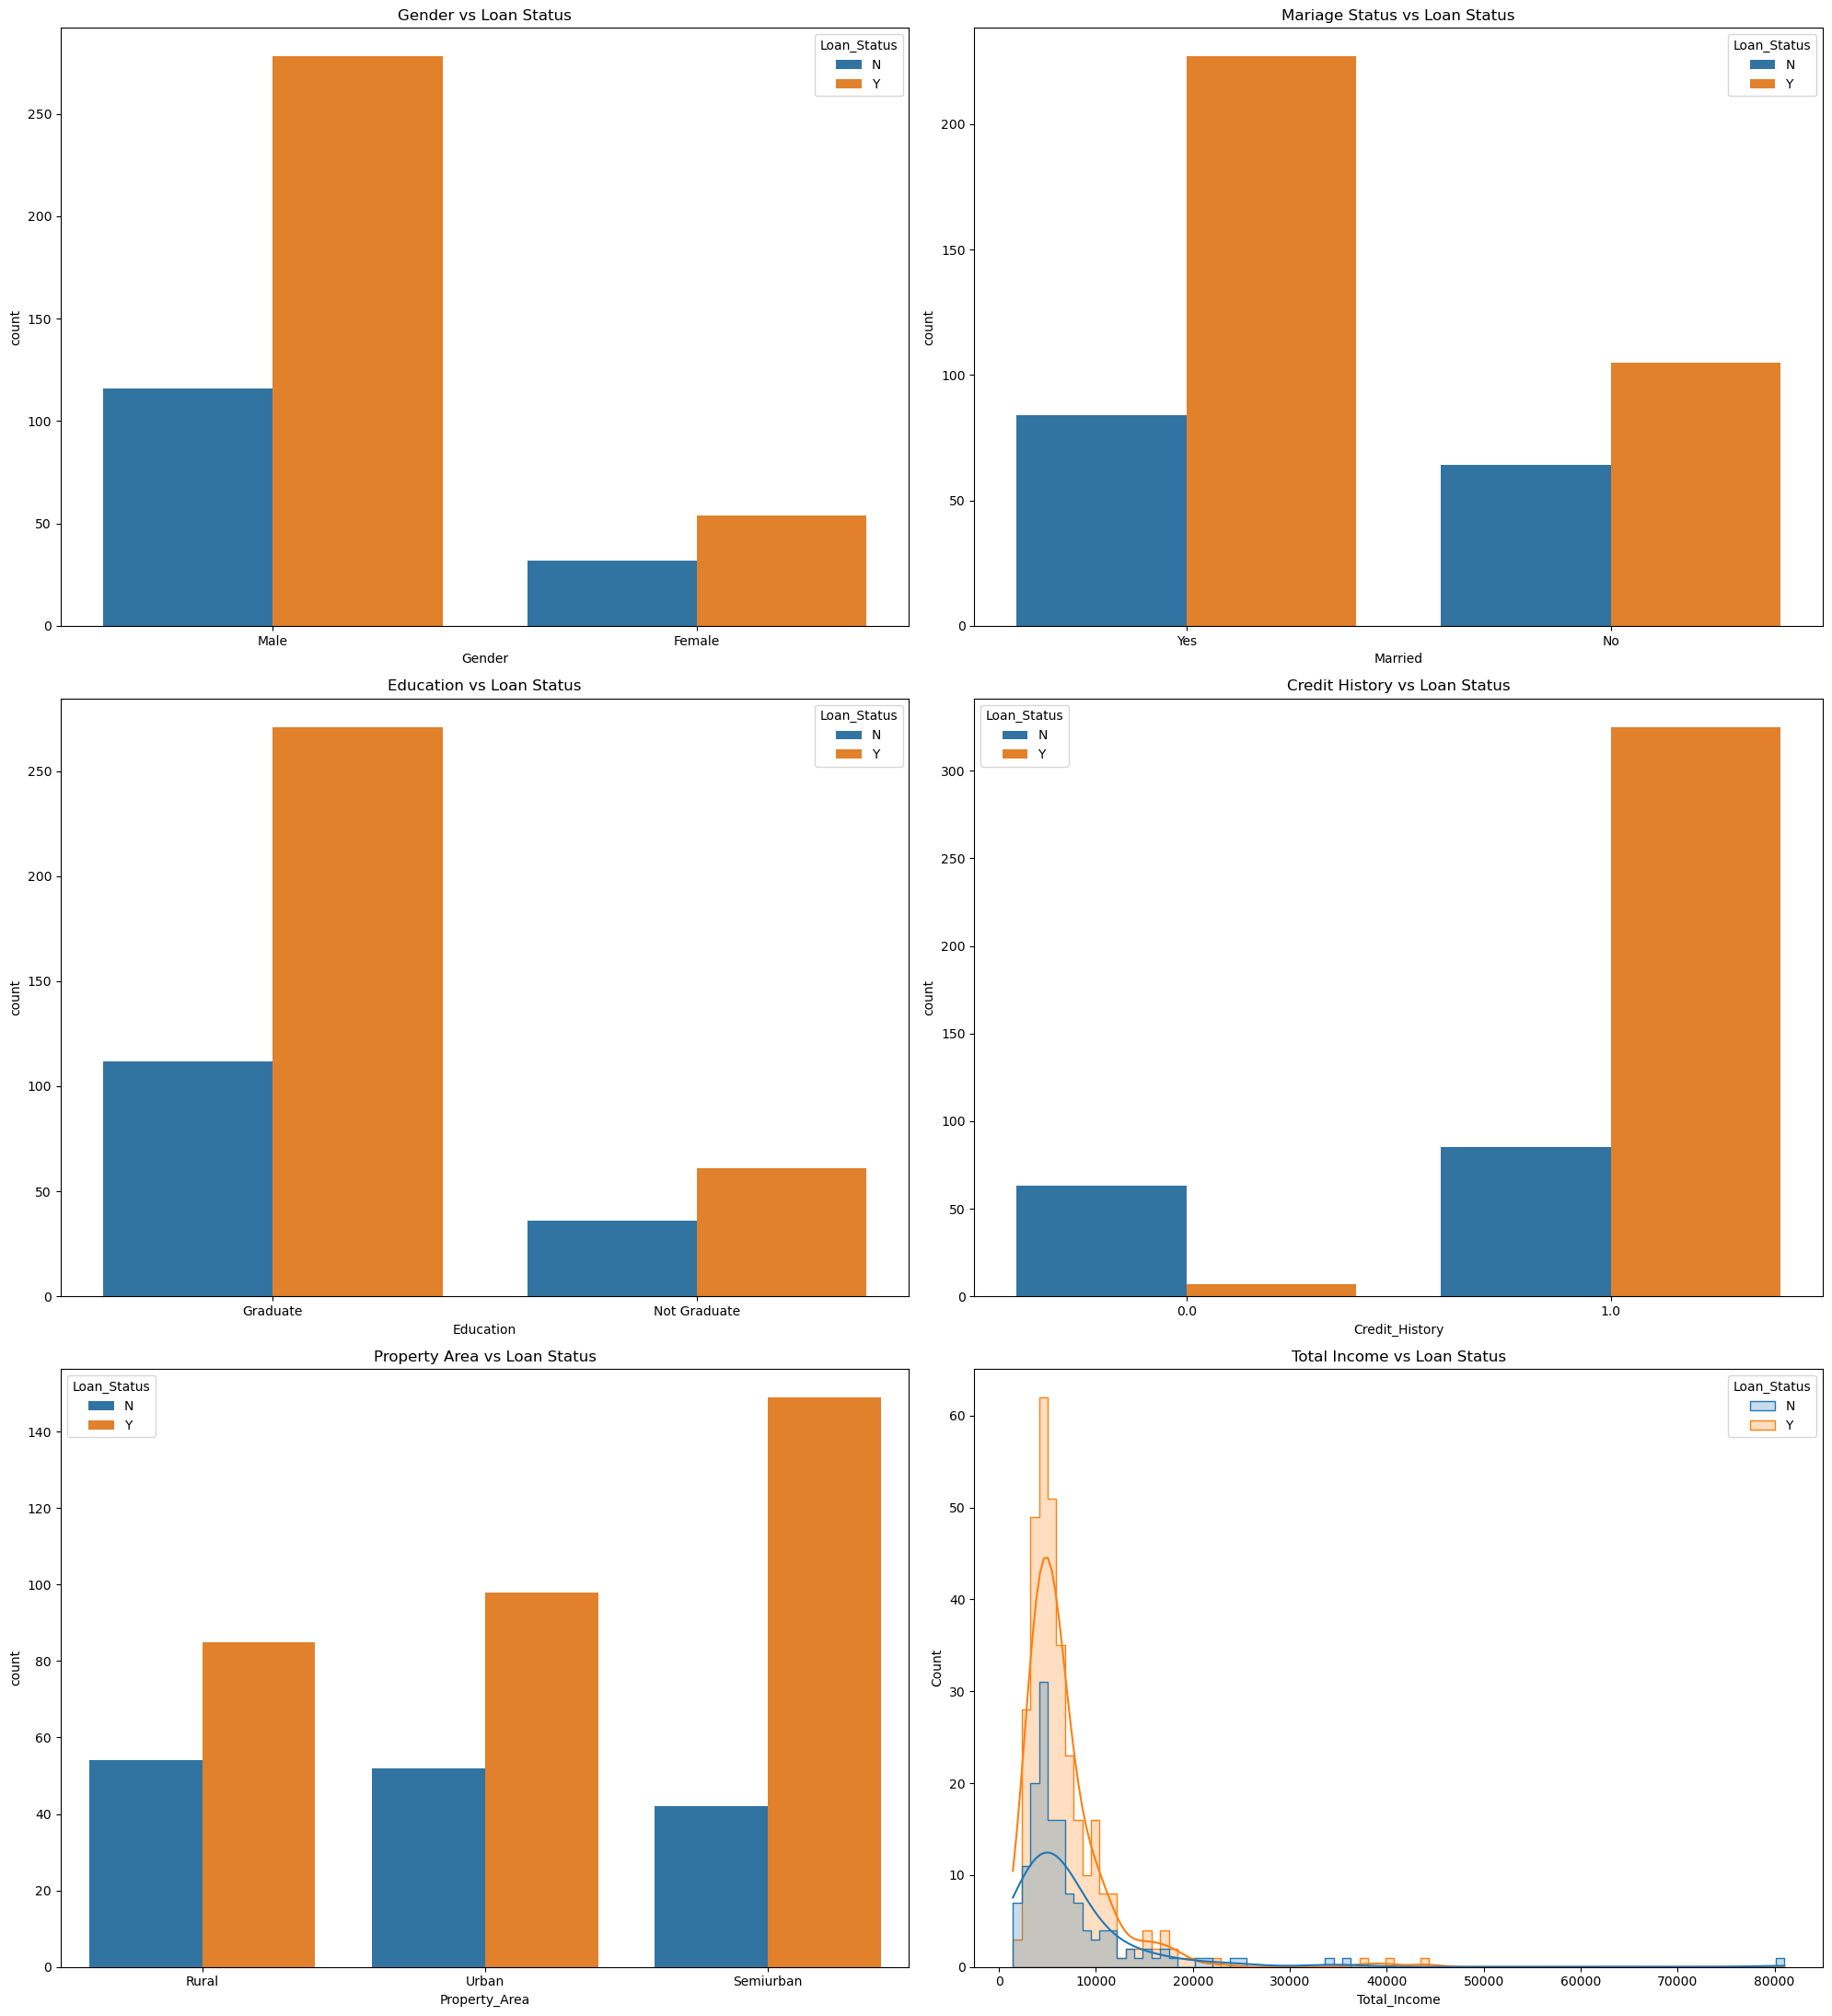

In [12]:
fig, axes = plt.subplots(3, 2, figsize=(20, 22))


# 1) Gender vs Loan Status
sns.countplot(ax = axes[0, 0], x = 'Gender', hue = 'Loan_Status', data = df)
axes[0, 0].set_title('Gender vs Loan Status')

# 2) Mariage Status vs Loan Status
sns.countplot(ax = axes[0, 1], x = 'Married', hue = 'Loan_Status', data = df)
axes[0, 1].set_title('Mariage Status vs Loan Status')

# 3) Education vs Loan Status
sns.countplot(ax = axes[1, 0], x ='Education', hue = 'Loan_Status', data = df)
axes[1, 0].set_title('Education vs Loan Status')

# 4) Credit History vs Loan Status
sns.countplot(ax = axes[1, 1], x = 'Credit_History', hue = 'Loan_Status', data = df)
axes[1, 1].set_title('Credit History vs Loan Status')

# 5) Property Area vs Loan Status
sns.countplot(ax = axes[2, 0], x = 'Property_Area', hue = 'Loan_Status', data = df)
axes[2, 0].set_title('Property Area vs Loan Status')

# 6) Total Income vs Loan Status
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

sns.histplot(ax = axes[2, 1], data = df, x = 'Total_Income', hue = 'Loan_Status', kde=True, element='step')
axes[2, 1].set_title('Total Income vs Loan Status')

plt.tight_layout()
plt.show()

Derived Insights:

1) Gender vs Loan Status: There seems to be no signficant difference in loan eligablity between the genders. Infact, it appears that both genders have an approximate ratio of 2:1

2) Mariage Status vs Loan Status: Married couple have a slight higher chance of loan approval than Unmarried couples

3) Education vs Loan Status: People that graduate have a higher possibility to be eligable for a loan approval than non-graduates

4) Credit History vs Loan Status: Candidates who have a credit history that satifies the guidelines we set have a remarkably higher chance for loan apprival. This indicates that if a candidate does not meet the guidelines, he will most likely get rejected immediately

5) Property Area vs Loan Status: Semiurban areas appear to have the highest approval rates

6) Total Income vs Loan Status: The higher the income the higher the chance for loan approval. However, the fact that there is a visable and considerable overlap suggest that this metric is not the only aspect to sole determinant


### Prediction Model: Logistic Regression


Choosing the Logistic Regression model is a strategic decision. It is ideal for binary classification. In this case, we find ourselves in a binary situation: Loan_Status = "yes" or "no"

##### Binary Conversion:

In [13]:
binary_conversion = df['Loan_Status'].apply(lambda x: 1 if x == 'Y' else 0) 
binary_conversion

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

##### Train-test Splitting: 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, binary_conversion, test_size=0.2, random_state=42)

##### Logistion Regression Implementation & Testing 

In [15]:
LR_Model = LogisticRegression(max_iter=300, solver='lbfgs', random_state=42)
LR_Model.fit(X_train, y_train)

LR_prediction = LR_Model.predict(X_test)

##### LR Model Evaluation

In [16]:
LR_accuracy = accuracy_score(y_test, LR_prediction)
scoring = classification_report(y_test, LR_prediction)

print("The accuracy score of the Logistic Regression Model is: ", math.ceil(LR_accuracy*100), "%")
print(scoring)

The accuracy score of the Logistic Regression Model is:  83 %
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



### Predicition Model Comparaison: Support Vector Machine (SVM), Random Forest, and Gradient Boosting Machine (GBM)

The SVM, Random Forest, and GBM are models that also work very well in binary classification. As our end goal is for this robust system to take over the dreadful task of manually studying and deciding whether a candidate is eligable for a loan or not, we opt to use the best, most efficient, and accurate model.

##### SVM:

In [17]:
SVM_Model = SVC(probability=True, random_state=42)
SVM_Model.fit(X_train, y_train)

SVM_Prediction = SVM_Model.predict(X_test)
SVM_accuracy = accuracy_score(y_test, SVM_Prediction)

##### Random Forest:

In [18]:
RF_Model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_Model.fit(X_train, y_train)

RF_Model_Predicition = RF_Model.predict(X_test)
RF_accuracy = accuracy_score(y_test, RF_Model_Predicition)

##### GBM:

In [19]:
GBM_Model = GradientBoostingClassifier(n_estimators=100, random_state=42)
GBM_Model.fit(X_train, y_train)

GBM_Model_Prediction = GBM_Model.predict(X_test)
GBM_accuracy = accuracy_score(y_test, GBM_Model_Prediction)

##### Accuracy Score Round up

In [20]:
LR_accuracy_RU = math.ceil(LR_accuracy*100)
SVM_accuracy_RU = math.ceil(SVM_accuracy*100)
RF_accuracy_RU = math.ceil(RF_accuracy*100)
GBM_accuracy_RU = math.ceil(GBM_accuracy*100)

##### Model Evaluation & Comparaison

In [21]:
print("Logistic Regression Accuracy:", LR_accuracy_RU, "%")
print("SVM Accuracy:", SVM_accuracy_RU, "%")
print("Random Forest Accuracy:", RF_accuracy_RU, "%")
print("Gradient Boosting Machine Accuracy:", GBM_accuracy_RU, "%")

Logistic Regression Accuracy: 83 %
SVM Accuracy: 71 %
Random Forest Accuracy: 82 %
Gradient Boosting Machine Accuracy: 79 %


In [22]:
best_model_score = max(LR_accuracy, SVM_accuracy, RF_accuracy, GBM_accuracy)

Model_dictionary = {"Logistic Regression Model": LR_accuracy, 
                    "SVM Model": SVM_accuracy,
                    "Random Forest Model": RF_accuracy,
                    "GBM Model": GBM_accuracy}

bestmodel = " "
for model, accuracy in Model_dictionary.items():
    if accuracy == best_model_score:
        print("The best model for the pipeline is the", model) 
        BestModel = model

The best model for the pipeline is the Logistic Regression Model


### Model Testing: Random Plug and Play
To test out the model, I decided to create function that generates a randomized dataset, based on the originial dataset columns, where each column is given a random variable. Once that is executed, we will then run the best prediction model, and find out whether the candidate is eligable for a loan or not  

##### Creating the Random DataSet Generator Function

In [40]:
def Random_Data_Generation(col_transformer):
    Randomized_Candidate = {'Gender': [np.random.choice(['Male', 'Female'])],
                   'Married': [np.random.choice(['Yes', 'No'])],
                   'Dependents': [str(np.random.choice([0, 1, 2, '3+']))],
                   'Education': [np.random.choice(['Graduate', 'Not Graduate'])],
                   'Self_Employed': [np.random.choice(['Yes', 'No'])],
                   'ApplicantIncome': [np.random.randint(1500, 15000)],
                   'CoapplicantIncome': [np.random.randint(0, 10000)],
                   'LoanAmount': [np.random.randint(50, 700)],
                   'Loan_Amount_Term': [np.random.choice([360, 180, 300, 240, 120])],
                   'Credit_History': [np.random.choice([0.0, 1.0])],
                   'Property_Area': [np.random.choice(['Urban', 'Semiurban', 'Rural'])]}
    
    random_df = pd.DataFrame(Randomized_Candidate)
    random_encoded = col_transformer.transform(random_df)
    
    return random_df, random_encoded

##### Best Model Recall

In [41]:
Model_dictionary2 = {"Logistic Regression Model": LR_Model, 
                    "SVM Model": SVM_Model,
                    "Random Forest Model": RF_Model,
                    "GBM Model": GBM_Model}

if BestModel in Model_dictionary2:
    Model_to_use = Model_dictionary2[BestModel]

##### Candidate Eligibility Function

In [42]:
def Candidate_Eligibility_Function(Model_to_use, random_encoded):
    prediction = Model_to_use.predict(random_encoded)
    return "APPROVED" if prediction[0] == 1 else "DENIED"

random_df, random_encoded = Random_Data_Generation(col_transformer)
eligibility = Candidate_Eligibility_Function(LR_Model, random_encoded)

##### Reading the Results

In [43]:
random_df['Candidate'] = 'Randomized Candidate'
random_df['Loan_Status'] = eligibility

In [44]:
ordered_columns = ['Candidate'] + [col for col in random_df.columns if col not in ['Candidate', 'Loan_Status']] + ['Loan_Status']
random_df = random_df[ordered_columns]

random_df.head()


,Candidate,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Randomized Candidate,Male,No,2,Not Graduate,No,9676,2566,537,300,1.0,Urban,DENIED


In [45]:
#Message to send the candidate: 
print("Hello " + random_df['Candidate'].iloc[0] + ". We would like to inform you that your Loan Request is " + eligibility)

Hello Randomized Candidate. We would like to inform you that your Loan Request is DENIED
